In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

columns_headers = [
    "time", "gender", "matric_%", "study_year","faculty","gpa_2023","accomodation","allowance","scholarship","study_hours",
    "party_week","drinks_night","missed_classes", "failed_classes", "in_relationship","parent_approve","relation_parent"
]
student_data = pd.read_csv("survey_student.csv", names = columns_headers, header = 0)

student_data.head()

,time,gender,matric_%,study_year,faculty,gpa_2023,accomodation,allowance,scholarship,study_hours,party_week,drinks_night,missed_classes,failed_classes,in_relationship,parent_approve,relation_parent
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [74]:
student_data.shape

(406, 17)

This dataset has **406** student records with **17** variables collected from a student survey about academic performance, lifestyle habits, and social factors, where gpa_2023 is used as the target variable.

In [75]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             406 non-null    object 
 1   gender           404 non-null    object 
 2   matric_%         399 non-null    float64
 3   study_year       333 non-null    object 
 4   faculty          399 non-null    object 
 5   gpa_2023         320 non-null    float64
 6   accomodation     383 non-null    object 
 7   allowance        375 non-null    object 
 8   scholarship      398 non-null    object 
 9   study_hours      403 non-null    object 
 10  party_week       404 non-null    object 
 11  drinks_night     404 non-null    object 
 12  missed_classes   403 non-null    object 
 13  failed_classes   403 non-null    object 
 14  in_relationship  403 non-null    object 
 15  parent_approve   402 non-null    object 
 16  relation_parent  403 non-null    object 
dtypes: float64(2), o

This dataset contains survey data of **406 students** and includes **17 columns**, out of which 2 are **numerical (float)** and 15 are **categorical (object)** variables.

In [76]:
student_data.isnull().sum()

time                0
gender              2
matric_%            7
study_year         73
faculty             7
gpa_2023           86
accomodation       23
allowance          31
scholarship         8
study_hours         3
party_week          2
drinks_night        2
missed_classes      3
failed_classes      3
in_relationship     3
parent_approve      4
relation_parent     3
dtype: int64

This dataset contains some missing values, mainly in **gpa_2023** and **study_year**, while most other columns have only a few or no missing entries. Overall, the dataset is mostly complete, with missing data concentrated in a few **academic-related** variables.

In [77]:
student_data.gender.value_counts(normalize=True)

gender
Male      0.534653
Female    0.465347
Name: proportion, dtype: float64

in this dataset, around **53.5%** of the students are **male** and **46.5%** are **female**, so the gender distribution is almost balanced.

In [78]:
student_data.groupby(by="gender")["gpa_2023"].median()

gender
Female    67.0
Male      64.0
Name: gpa_2023, dtype: float64

**Female** students show a **slightly higher and more stable GPA distribution compared to male students**, who display greater variability and more **extreme outliers**.

In [79]:
df_gpa = student_data.dropna(subset=["gpa_2023"])
df_gpa.isnull().sum()

time                0
gender              0
matric_%            2
study_year          1
faculty             3
gpa_2023            0
accomodation        2
allowance          14
scholarship         0
study_hours         0
party_week          0
drinks_night        0
missed_classes      1
failed_classes      0
in_relationship     1
parent_approve      1
relation_parent     1
dtype: int64

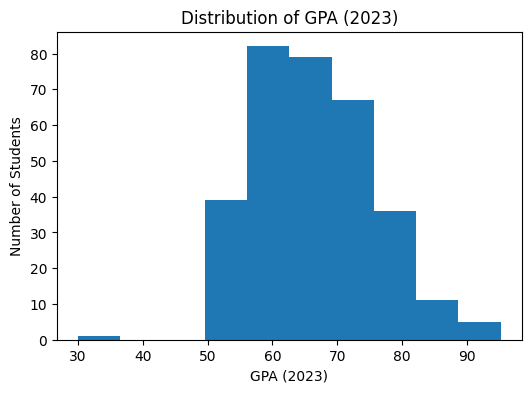

In [80]:
plt.figure(figsize=(6,4))
plt.hist(df_gpa["gpa_2023"], bins=10)
plt.xlabel("GPA (2023)")
plt.ylabel("Number of Students")
plt.title("Distribution of GPA (2023)")
plt.show()

The GPA scores for 2023 are mostly **concentrated between 55 and 75**, showing that most students performed around an **average to good level**. Only a few students fall at the extreme ends, with **very low or very high GPA**.

In [81]:
df_matric= student_data.dropna(subset=["matric_%","gpa_2023"])

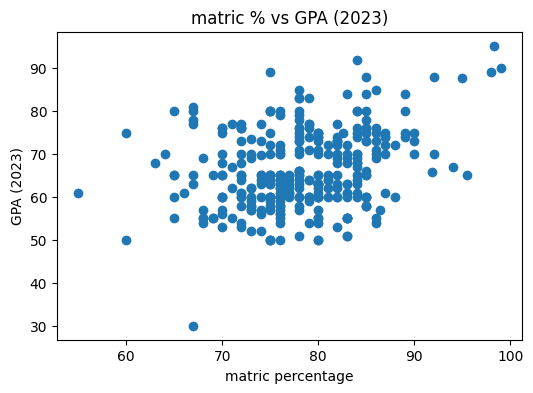

In [82]:
plt.figure(figsize=(6,4))
plt.scatter(df_matric["matric_%"],df_matric["gpa_2023"])
plt.xlabel("matric percentage")
plt.ylabel("GPA (2023)")
plt.title("matric % vs GPA (2023)")
plt.show()

The plot shows a **positive** relationship between **matric percentage and GPA in 2023**. Students with higher matric marks generally tend to have higher GPAs, although there is some spread, meaning not all high-scoring matric students perform the same at university.

In [83]:
df_matric["matric_%"].corr(df_matric["gpa_2023"])

np.float64(0.29910363012959096)

The correlation value of **0.299** shows a **weak but positive relationship between matric percentage and GPA in 2023**, students with higher matric scores tend to have slightly higher GPAs, but the relationship is not strong.
**multi-factor influence**.

<Figure size 700x400 with 0 Axes>

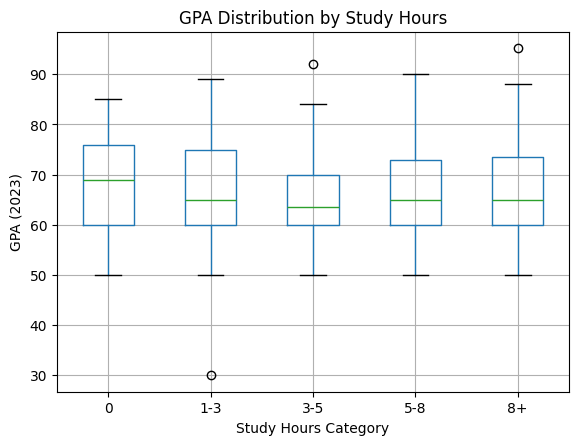

In [84]:
df_study = student_data.dropna(subset=["study_hours", "gpa_2023"])
plt.figure(figsize=(7,4))
df_study.boxplot(column="gpa_2023", by="study_hours")
plt.xlabel("Study Hours Category")
plt.ylabel("GPA (2023)")
plt.title("GPA Distribution by Study Hours")
plt.suptitle("")
plt.show()

The plot shows how GPA changes across different study-hour groups. Students who study more hours generally have **higher** GPAs.
positive relation between study time and academic performance.

<Figure size 700x400 with 0 Axes>

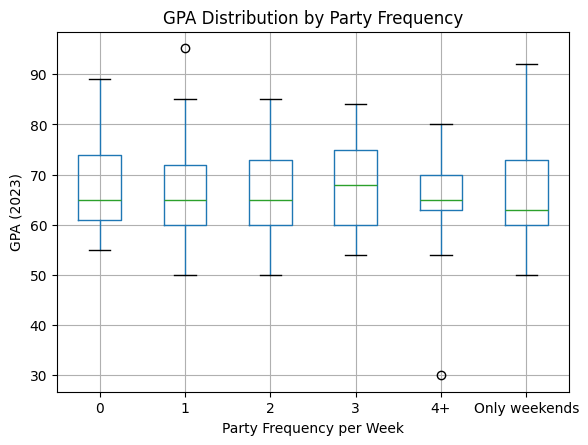

In [85]:
df_party = student_data.dropna(subset=["party_week", "gpa_2023"])
plt.figure(figsize=(7,4))
df_party.boxplot(column="gpa_2023", by="party_week")
plt.xlabel("Party Frequency per Week")
plt.ylabel("GPA (2023)")
plt.title("GPA Distribution by Party Frequency")
plt.suptitle("")
plt.show()

The boxplot indicates a **negative relationship** between **party frequency and GPA (2023)**.

<Figure size 700x400 with 0 Axes>

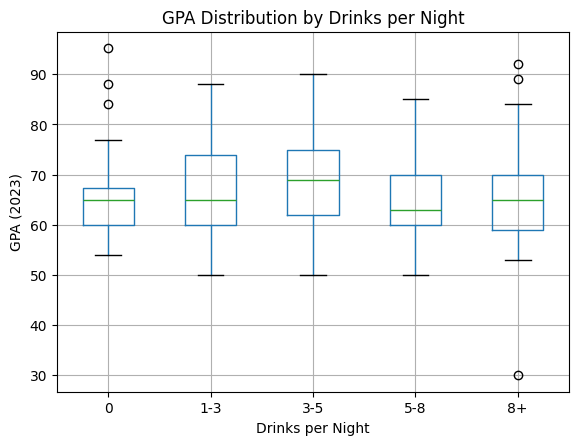

In [86]:
df_drinks = student_data.dropna(subset=["drinks_night", "gpa_2023"])
plt.figure(figsize=(7,4))
df_drinks.boxplot(column="gpa_2023", by="drinks_night")
plt.xlabel("Drinks per Night")
plt.ylabel("GPA (2023)")
plt.title("GPA Distribution by Drinks per Night")
plt.suptitle("")
plt.show()

The relationship is **weakly negative**, meaning alcohol consumption may be associated with GPA, but it is not a dominant factor.

<Figure size 700x400 with 0 Axes>

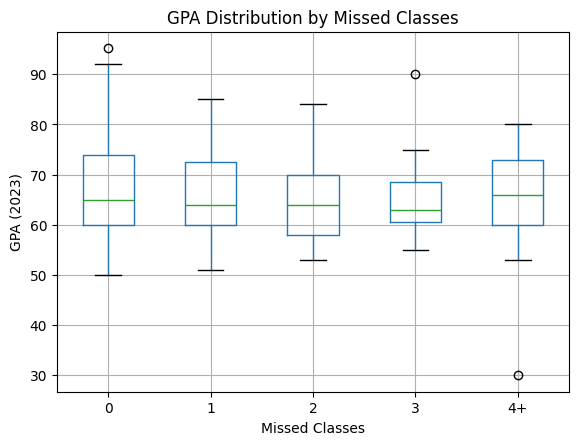

In [87]:
df_missed = student_data.dropna(subset=["missed_classes", "gpa_2023"])
plt.figure(figsize=(7,4))
df_missed.boxplot(column="gpa_2023", by="missed_classes")
plt.xlabel("Missed Classes")
plt.ylabel("GPA (2023)")
plt.title("GPA Distribution by Missed Classes")
plt.suptitle("")
plt.show()

The boxplot shows **negative trend** indicates that students who miss more classes tend to perform worse academically.

<Figure size 700x400 with 0 Axes>

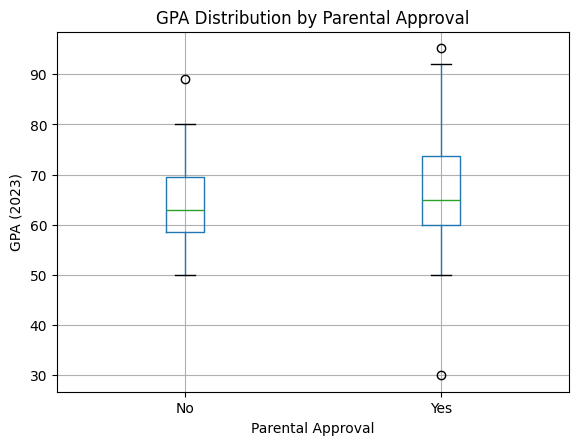

In [88]:
df_parent = student_data.dropna(subset=["parent_approve", "gpa_2023"])
plt.figure(figsize=(7,4))
df_parent.boxplot(column="gpa_2023", by="parent_approve")
plt.xlabel("Parental Approval")
plt.ylabel("GPA (2023)")
plt.title("GPA Distribution by Parental Approval")
plt.suptitle("")
plt.show()

Parental approval shows a slight **positive association** with GPA, but its effect is relatively **weak** compared to **academic and lifestyle factors**.

<Figure size 700x400 with 0 Axes>

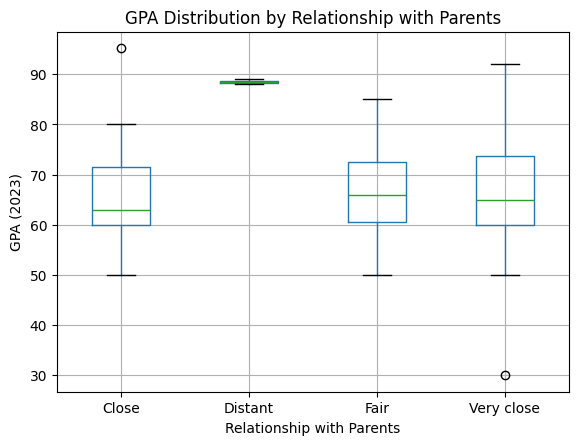

In [89]:
df_relation = student_data.dropna(subset=["relation_parent", "gpa_2023"])
plt.figure(figsize=(7,4))
df_relation.boxplot(column="gpa_2023", by="relation_parent")
plt.xlabel("Relationship with Parents")
plt.ylabel("GPA (2023)")
plt.title("GPA Distribution by Relationship with Parents")
plt.suptitle("")
plt.show()

A positive parent–child relationship shows a weak positive association with GPA, but it is not a strong standalone predictor of academic performance

### conclusion: 
#### Academic behaviors such as study time and attendance have a stronger influence on GPA than lifestyle or family-related factors in this dataset.

## chi_square check:

In [90]:
df_chi = student_data.dropna(subset=["gender", "scholarship"])

ct = pd.crosstab(df_chi["gender"], df_chi["scholarship"])
ct

scholarship,No,"Yes (NSFAS, etc...)"
gender,,
Female,165,19
Male,187,27


In [91]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(ct)

chi2, p

(np.float64(0.30850459045998935), np.float64(0.5785992813009719))

the **p-value** is greater than **0.05**, gender and scholarship status are **independent**.

In [ ]:
df_gpa = student_data.dropna(subset=["gpa_2023"])
df_gpa["z_score"] = np.abs(stats.zscore(df_gpa["gpa_2023"]))
z_outliers = df_gpa[df_gpa["z_score"] > 3]

In [97]:
z_outliers.shape

(2, 18)

In [98]:
Q1 = df_gpa["gpa_2023"].quantile(0.25)
Q3 = df_gpa["gpa_2023"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df_gpa[
    (df_gpa["gpa_2023"] < lower_bound) | (df_gpa["gpa_2023"] > upper_bound)]

In [99]:
iqr_outliers.shape

(2, 18)

Both **Z-score and IQR methods** identified the **same number of outliers** in the GPA data.